<a href="https://colab.research.google.com/github/Devu-Goyal/NLP-Project-Round-1/blob/main/NLP_round_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [116]:
file = open(r"a-town-drowning.txt", encoding='utf-8')
# for preventing next line space
wordList = file.read().splitlines() 
text1 = ""
text1 = text1.join(wordList)

file = open(r"stained-glass-window.txt", encoding='utf-8')
# for preventing next line space
wordList = file.read().splitlines() 
text2 = ""
text2 = text2.join(wordList)

In [117]:
#for converting text in lowercase

text1 = text1.lower()
text2 = text2.lower()

In [118]:
# for removing numbers
text1 = re.sub(r'\d+','',text1) 
text2 = re.sub(r'\d+','',text2) 

In [ ]:
# for removing URL's
def remove_URL(text):
    return re.sub(r"http\S+", "", text)
remove_URL(text1)
remove_URL(text2)

In [120]:
def discard_useless_part (text):
  sidx = text.find('*** START OF THIS PROJECT ')
  eidx = text.find('*** END OF THIS PROJECT ')
  print("Discarding Before - ", sidx)
  print("Discarding After - ", eidx)
  text = text[sidx:eidx]
  return text
discard_useless_part (text1)
discard_useless_part (text2)

Discarding Before -  -1
Discarding After -  -1
Discarding Before -  -1
Discarding After -  -1


''

In [ ]:
# for removing white-spaces
def del_whitespace(text):
  return " ".join(text.split())
del_whitespace(text1)
del_whitespace(text2)


In [ ]:
# for removing panctuations
def remove_punctuation(text):
  tokens = word_tokenize(text)
  words = [word for word in tokens if word.isalpha()]
  return ' '.join(words)

remove_punctuation(text1)
remove_punctuation(text2)


In [123]:
# for removing panctuations
punct = '''!()[]{}-+/*=|\/?.,><:;""@#$%^&~`_'''
cleantxt1 = ""
for i in text1:
  if i not in punct:
    cleantxt1 = cleantxt1 + i

cleantxt2 = ""
for i in text2:
  if i not in punct:
    cleantxt2 = cleantxt2 + i
text1 = cleantxt1
text2 = cleantxt2

In [124]:
def decontracted(text):
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text
decontracted(text1)
decontracted(text2)

"the project gutenberg ebook of stained glass windows by williamfrederic faberthis ebook is for the use of anyone anywhere in the united states andmost other parts of the world at no cost and with almost no restrictionswhatsoever you may copy it give it away or reuse it under the termsof the project gutenberg license included with this ebook or online atwwwgutenbergorg if you are not located in the united states youwill have to check the laws of the country where you are located beforeusing this ebooktitle stained glass windows       an essay with a report to the vestry on stained glass windows       for grace church lockport new yorkauthor william frederic faberrelease date november   ebook language englishproduced by donald cummings and the online distributed proofreading             team at httpswwwpgdpnet this file was produced from             images generously made available by the internet archive start of the project gutenberg ebook stained glass windows                        

In [125]:
# lemmetisation of text
lemmatizer = WordNetLemmatizer()
def lemmatize (text):
  wrd_token = word_tokenize(text)
  # for providing context
  lemma = [lemmatizer.lemmatize(word, pos='v') for word in wrd_token]
  return lemma

lemmatize(text1)
lemmatize(text2)

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'stain',
 'glass',
 'windows',
 'by',
 'williamfrederic',
 'faberthis',
 'ebook',
 'be',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'unite',
 'state',
 'andmost',
 'other',
 'part',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictionswhatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 'reuse',
 'it',
 'under',
 'the',
 'termsof',
 'the',
 'project',
 'gutenberg',
 'license',
 'include',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'atwwwgutenbergorg',
 'if',
 'you',
 'be',
 'not',
 'locate',
 'in',
 'the',
 'unite',
 'state',
 'youwill',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'be',
 'locate',
 'beforeusing',
 'this',
 'ebooktitle',
 'stain',
 'glass',
 'windows',
 'an',
 'essay',
 'with',
 'a',
 'report',
 'to',
 'the',
 'vestry',
 'on',
 'stain',
 'glass',
 'windows',
 'for',
 'grace',

In [126]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text1)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = "  "
finaltext = finaltext.join(tokens_final)
text1 = finaltext

tokens = word_tokenize(text2)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = "  "
finaltext = finaltext.join(tokens_final)
text2 = finaltext



In [127]:
def noun(text):
  is_noun = lambda pos: pos[:1] == 'N'
  tokenized = nltk.word_tokenize(text)
  nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
  return nouns
n1=noun(text1)
n2=noun(text2)

print("Nouns in Text1 -: " + str(len(n1)))
print("Nouns in Text2 -: " + str(len(n2)))


Nouns in Text1 -: 10735
Nouns in Text2 -: 2988


In [128]:
def verb(text):
  is_verb = lambda pos: pos[:1] == 'V'
  tokenized = nltk.word_tokenize(text)
  verbs = [word for (word, pos) in nltk.pos_tag(tokenized) if is_verb(pos)] 
  return verbs
v1=verb(text1)
v2=verb(text2)

print("Verbs in Text1 -: " + str(len(v1)))
print("Verbs in Text2 -: " + str(len(v2)))

Verbs in Text1 -: 6913
Verbs in Text2 -: 1315


In [129]:
# finds all noun Lexnames, all Verb Lexnames which will be used for frequency distributions
def all_synsets(no,ve):
  n=[]
  v=[]
  for word in no:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        n.append(synset.lexname())
      if('verb' in synset.lexname()):
        v.append(synset.lexname())
  for word in ve:
    for synset in wn.synsets(word): 
      if(('noun' in synset.lexname()) & ('Tops' not in synset.lexname()) ):
        n.append(synset.lexname())
      if('verb' in synset.lexname()):
        v.append(synset.lexname())
      
  return n,v

nounSet1,verbSet1=all_synsets(n1,v1)
nounSet2,verbSet2=all_synsets(n2,v2)


In [ ]:
labels, counts = np.unique(nounSet1,return_counts=True)
ticks = range(len(counts))
plt.figure(figsize=(10,6))
plt.xlabel('Noun length')
plt.ylabel('Noun length Frequency')
plt.title('Frequency Distribution for the book A drowning town')

plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))



([<matplotlib.axis.XTick at 0x7f74bd886590>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21'),
  Text(0, 0, '22'),
  Text(0, 0, '23'),
  Text(0, 0, '24')])

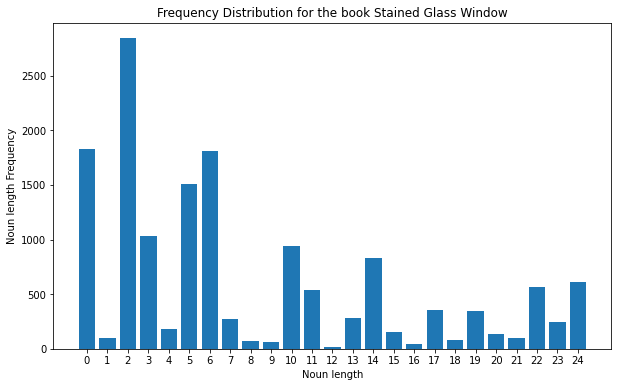

In [131]:
labels, counts = np.unique(nounSet2,return_counts=True)
ticks = range(len(counts))

plt.figure(figsize=(10,6))
plt.xlabel('Noun length')
plt.ylabel('Noun length Frequency')
plt.title('Frequency Distribution for the book Stained Glass Window')
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))


In [ ]:
labels, counts = np.unique(verbSet1,return_counts=True)
ticks = range(len(counts))

plt.figure(figsize=(10,6))
plt.xlabel('verb length')
plt.ylabel('verb length Frequency')
plt.title('Frequency Distribution for the book A drowning town')
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))




([<matplotlib.axis.XTick at 0x7f74c2128e90>,
 [Text(0, 0, '0'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14')])

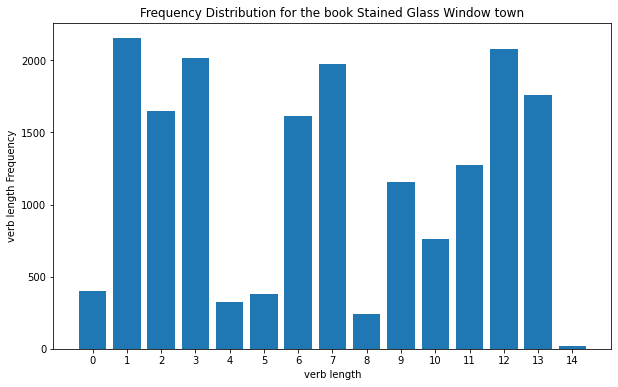

In [133]:
labels, counts = np.unique(verbSet2,return_counts=True)
ticks = range(len(counts))

plt.figure(figsize=(10,6))
plt.xlabel('verb length')
plt.ylabel('verb length Frequency')
plt.title('Frequency Distribution for the book Stained Glass Window town')
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, range(len(labels)))

In [134]:
nlp = en_core_web_sm.load()                 # it includes vocabulary, syntaxes, entities
d1 = nlp(text1)
d2 = nlp(text2)
print("Entities in text1 "+str(len(d1.ents)))
print("Entities in text2 "+str(len(d2.ents)))

Entities in text1 1176
Entities in text2 237


In [ ]:
print([(X, X.ent_iob_) for X in d1[:1000]])

In [136]:
def entity_recognition(text):
  doc=nlp(text)
  person=[]
  org=[]
  location=[]
  for X in doc:  
    if (X.ent_type_=='PERSON') and X.text not in person:
      person.append(X.text)
    if (X.ent_type_=='ORG')and X.text not in org:
      org.append(X.text)
    if ((X.ent_type_=='LOC') or (X.ent_type_=='GPE')) and X.text not in location:
      location.append(X.text)
  return person,org,location
   
person1,org1,location1=entity_recognition(text1)
person2,org2,location2=entity_recognition(text2)
print("person entities in text1 -: "+str(len(person1)))
print("person entities in text2 -: "+str(len(person2)))

print("organization entities in text1 -: "+str(len(org1)))
print("organization entities in text2 -: "+str(len(org2)))

print("location entities in text1 -: "+str(len(location1)))
print("location entities in text2 -: "+str(len(location2)))


person entities in text1 -: 199
person entities in text2 -: 33
organization entities in text1 -: 108
organization entities in text2 -: 15
location entities in text1 -: 107
location entities in text2 -: 29


In [ ]:
def freq(str_list): 
    unique_words = set(str_list)
    counts = {}
    for words in unique_words : 
        counts[words] = str_list.count(words)
    return counts
X = freq(person1)
print(sorted(X.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 